# I) Librairies

In [31]:
import pandas as pd
import spacy
nlp = spacy.load("fr_core_news_sm")
import os
import seaborn as sns
import matplotlib.pyplot as plt

import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords #stopwords
from nltk.tokenize import word_tokenize, sent_tokenize # tokenizing
from nltk.stem import PorterStemmer, LancasterStemmer #using the porter stemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
import re

from textblob import TextBlob
from textblob_fr import PatternTagger, PatternAnalyzer
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

stop_words=set(nltk.corpus.stopwords.words('french'))
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mathi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mathi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\mathi\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

# II) Importation des données

In [2]:
star_wars_1 = pd.read_excel("P:/Mathis/MASTER 2/S2/NLP/Projet/BDD/starwars_1_1999.xlsx", decimal=",")
star_wars_2 = pd.read_excel("P:/Mathis/MASTER 2/S2/NLP/Projet/BDD/starwars_2_2002.xlsx", decimal=",")
star_wars_3 = pd.read_excel("P:/Mathis/MASTER 2/S2/NLP/Projet/BDD/starwars_3_2005.xlsx", decimal=",")
star_wars_4 = pd.read_excel("P:/Mathis/MASTER 2/S2/NLP/Projet/BDD/starwars_4_1977.xlsx", decimal=",")
star_wars_5 = pd.read_excel("P:/Mathis/MASTER 2/S2/NLP/Projet/BDD/starwars_5_1980.xlsx", decimal=",")
star_wars_6 = pd.read_excel("P:/Mathis/MASTER 2/S2/NLP/Projet/BDD/starwars_6_1983.xlsx", decimal=",")
star_wars_7 = pd.read_excel("P:/Mathis/MASTER 2/S2/NLP/Projet/BDD/starwars_7_2015.xlsx", decimal=",")
star_wars_8 = pd.read_excel("P:/Mathis/MASTER 2/S2/NLP/Projet/BDD/starwars_8_2017.xlsx", decimal=",")
star_wars_9 = pd.read_excel("P:/Mathis/MASTER 2/S2/NLP/Projet/BDD/starwars_9_2019.xlsx", decimal=",")

In [3]:
star_wars_1["film"] = 1
star_wars_2["film"] = 2
star_wars_3["film"] = 3
star_wars_4["film"] = 4
star_wars_5["film"] = 5
star_wars_6["film"] = 6
star_wars_7["film"] = 7
star_wars_8["film"] = 8
star_wars_9["film"] = 9

star_wars_1["trilogie"] = 1
star_wars_2["trilogie"] = 1
star_wars_3["trilogie"] = 1
star_wars_4["trilogie"] = 2
star_wars_5["trilogie"] = 2
star_wars_6["trilogie"] = 2
star_wars_7["trilogie"] = 3
star_wars_8["trilogie"] = 3
star_wars_9["trilogie"] = 3

In [4]:
star_wars = pd.concat([star_wars_1, 
                        star_wars_2, 
                        star_wars_3, 
                        star_wars_4, 
                        star_wars_5, 
                        star_wars_6, 
                        star_wars_7, 
                        star_wars_8,
                        star_wars_9])
star_wars.head()

,Date_publication,Auteur,Note,Content,Like,Dislike,film,trilogie
0,2006-09-29,NaN,5.0,Après avoir vu la saga complète je dois dire q...,35,1,1,1
1,2016-01-13,NaN,4.0,Star Wars : La menace fantôme a déçu pas mal d...,32,0,1,1
2,2012-10-19,sparowtony,4.0,"Un bon film !\nC'est sur,ce n'est pas le meill...",32,5,1,1
3,2014-05-09,Eric C.,5.0,"Tout est la ; la musique, les images, les deco...",11,1,1,1
4,2016-01-19,NaN,5.0,"Après avoir vu Le réveil de la force, ce navet...",23,5,1,1


# III) Statistiques descriptives

## 1. Boxplot

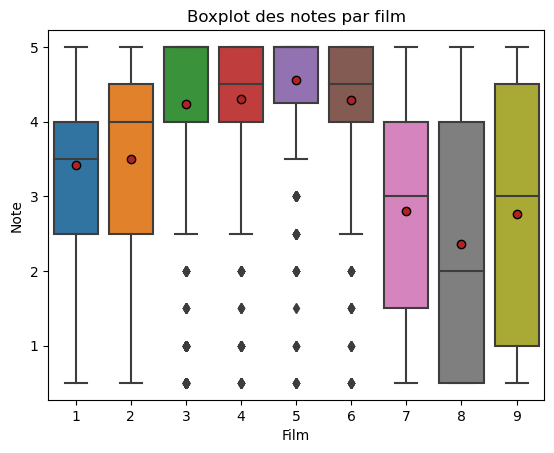

In [5]:
meanprops = {"marker": "o", "markeredgecolor": "black", "markerfacecolor": "firebrick"}
sns.boxplot(x="film", y="Note", data=star_wars, showmeans=True, meanprops=meanprops)
plt.xlabel("Film")
plt.ylabel("Note")
plt.title("Boxplot des notes par film")
plt.show()

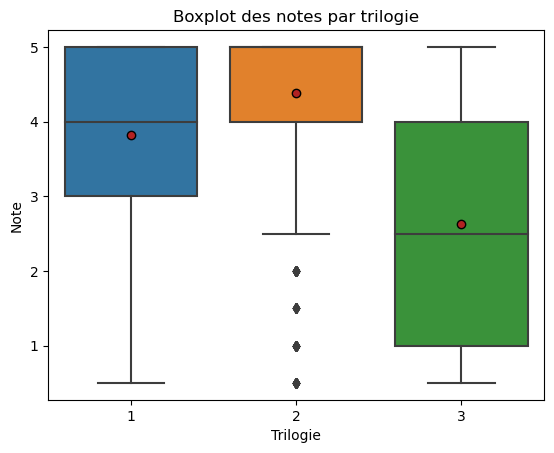

In [10]:
sns.boxplot(x="trilogie", y="Note", data=star_wars, showmeans=True, meanprops=meanprops)
plt.xlabel("Trilogie")
plt.ylabel("Note")
plt.title("Boxplot des notes par trilogie")
plt.show()

## 2. Tableaux

In [6]:
description_by_film = star_wars.groupby('film')['Note'].describe()
description_by_film

,count,mean,std,min,25%,50%,75%,max
film,,,,,,,,
1,1442.0,3.420250,1.256304,0.5,2.50,3.5,4.0,5.0
2,1112.0,3.498201,1.260954,0.5,2.50,4.0,4.5,5.0
3,2247.0,4.237650,1.175987,0.5,4.00,5.0,5.0,5.0
4,1122.0,4.306150,0.948536,0.5,4.00,4.5,5.0,5.0
5,1055.0,4.557820,0.785285,0.5,4.25,5.0,5.0,5.0
6,912.0,4.287829,0.903825,0.5,4.00,4.5,5.0,5.0
7,4711.0,2.797920,1.493021,0.5,1.50,3.0,4.0,5.0
8,4594.0,2.364606,1.690078,0.5,0.50,2.0,4.0,5.0
9,2740.0,2.758394,1.627344,0.5,1.00,3.0,4.5,5.0


In [7]:
description_by_trilogie = star_wars.groupby('trilogie')['Note'].describe()
description_by_trilogie

,count,mean,std,min,25%,50%,75%,max
trilogie,,,,,,,,
1,4801.0,3.820871,1.281637,0.5,3.0,4.0,5.0,5.0
2,3089.0,4.386695,0.890698,0.5,4.0,5.0,5.0,5.0
3,12045.0,2.623661,1.613961,0.5,1.0,2.5,4.0,5.0


In [9]:
likes_par_note_film = star_wars.groupby(['film', 'Note'])['Like'].sum().reset_index()
likes_par_note_film

,film,Note,Like
0,1,0.5,50
1,1,1.0,42
2,1,1.5,21
3,1,2.0,10
4,1,2.5,17
...,...,...,...
85,9,3.0,115
86,9,3.5,201
87,9,4.0,417
88,9,4.5,453


In [14]:
likes_by_note_film_1 = likes_par_note_film[likes_par_note_film["film"]==1]
likes_by_note_film_2 = likes_par_note_film[likes_par_note_film["film"]==2]
likes_by_note_film_3 = likes_par_note_film[likes_par_note_film["film"]==3]
likes_by_note_film_4 = likes_par_note_film[likes_par_note_film["film"]==4]
likes_by_note_film_5 = likes_par_note_film[likes_par_note_film["film"]==5]
likes_by_note_film_6 = likes_par_note_film[likes_par_note_film["film"]==6]
likes_by_note_film_7 = likes_par_note_film[likes_par_note_film["film"]==7]
likes_by_note_film_8 = likes_par_note_film[likes_par_note_film["film"]==8]
likes_by_note_film_9 = likes_par_note_film[likes_par_note_film["film"]==9]
print(likes_by_note_film_1)
# print(likes_by_note_film_2)
# print(likes_by_note_film_3)
# print(likes_by_note_film_4)
# print(likes_by_note_film_5)
# print(likes_by_note_film_6)
# print(likes_by_note_film_7)
# print(likes_by_note_film_8)
# print(likes_by_note_film_9)

   film  Note  Like
0     1   0.5    50
1     1   1.0    42
2     1   1.5    21
3     1   2.0    10
4     1   2.5    17
5     1   3.0    64
6     1   3.5    68
7     1   4.0   214
8     1   4.5    39
9     1   5.0   167


# III) Analyse

## 1. Adjectifs positifs/négatifs

In [16]:
# Listes d'adjectifs positifs et négatifs (à compléter selon les besoins)
positive_adjectives = {"incroyable", "magnifique", "fantastique", "excellent", "merveilleux", "superbe", "génial", "poignant", 
                       "intéressant", "parfait", "captivant", "formidable", "exceptionnel", "brillant", "admirable", "envoutant",
                       "sublime", "intense", "splendide", "plaisant"}
negative_adjectives = {"horrible", "terrible", "mauvais", "décevant", "affreux", "nul", "moche", "banal", "prévisible", "insupportable",
                       "ennuyeux", "lamentable", "pathétique", "médiocre", "exécrable", "abominable", "désastreux", "pénible", "déplorable", "navrant"}

# Fonction pour extraire les adjectifs d'un texte
def extract_adjectives(text):
    doc = nlp(text)
    adjectives = [token.text for token in doc if token.pos_ == 'ADJ']
    return adjectives

# Fonction pour classifier les adjectifs et compter les positifs et négatifs
def count_adjectives(adjectives):
    positive_count = sum(1 for adj in adjectives if adj in positive_adjectives)
    negative_count = sum(1 for adj in adjectives if adj in negative_adjectives)
    return positive_count, negative_count

# Appliquer les fonctions pour chaque critique
star_wars['adjectives'] = star_wars['Content'].apply(lambda x: extract_adjectives(x) if isinstance(x, str) else [])
star_wars['positive_adjectives'], star_wars['negative_adjectives'] = zip(*star_wars['adjectives'].apply(count_adjectives))

# Agréger les résultats par film
adjective_count_per_film = star_wars.groupby('film').agg({
    'positive_adjectives': 'sum',
    'negative_adjectives': 'sum'
}).reset_index()

# Afficher les résultats
print(adjective_count_per_film)

   film  positive_adjectives  negative_adjectives
0     1                  361                  261
1     2                  285                  212
2     3                  734                  222
3     4                  319                   64
4     5                  261                   52
5     6                  255                   72
6     7                 1066                 1151
7     8                 1061                 1353
8     9                  481                  553


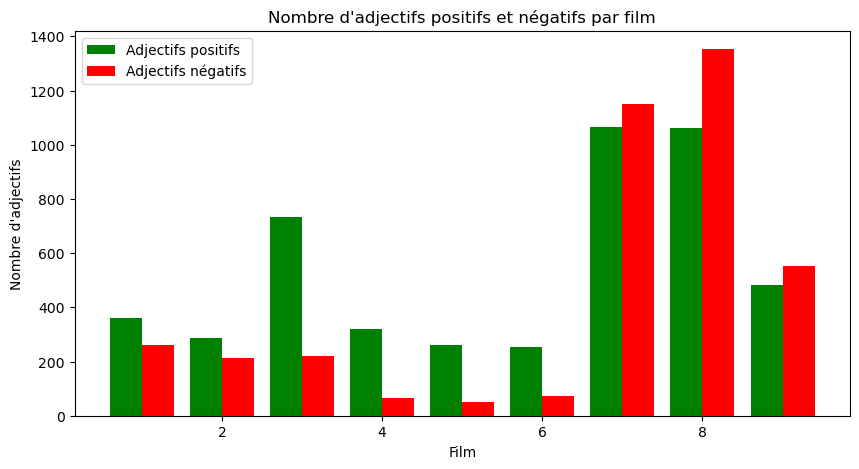

In [17]:
plt.figure(figsize=(10, 5))
plt.bar(adjective_count_per_film['film'] - 0.2, adjective_count_per_film['positive_adjectives'], width=0.4, label='Adjectifs positifs', color='green')
plt.bar(adjective_count_per_film['film'] + 0.2, adjective_count_per_film['negative_adjectives'], width=0.4, label='Adjectifs négatifs', color='red')
plt.xlabel('Film')
plt.ylabel('Nombre d\'adjectifs')
plt.title('Nombre d\'adjectifs positifs et négatifs par film')
plt.legend()
plt.show()

## 2. Nuage de mots

In [32]:
def clean_text(Content): #do the lemaatization
    le=WordNetLemmatizer()
    word_tokens=word_tokenize(Content)
    tokens=[le.lemmatize(w) for w in word_tokens if w not in stop_words and len(w)>3]
    cleaned_text=" ".join(tokens)
    return cleaned_text

In [33]:
star_wars['Content_cleaned_text']=star_wars['Content'].apply(clean_text)

c:\Users\mathi\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['star', 'war', 'wars'] not in stop_words.
  warnings.warn(


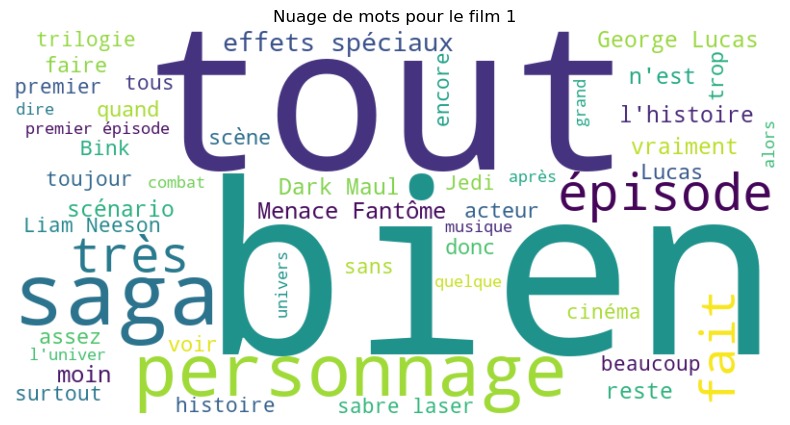

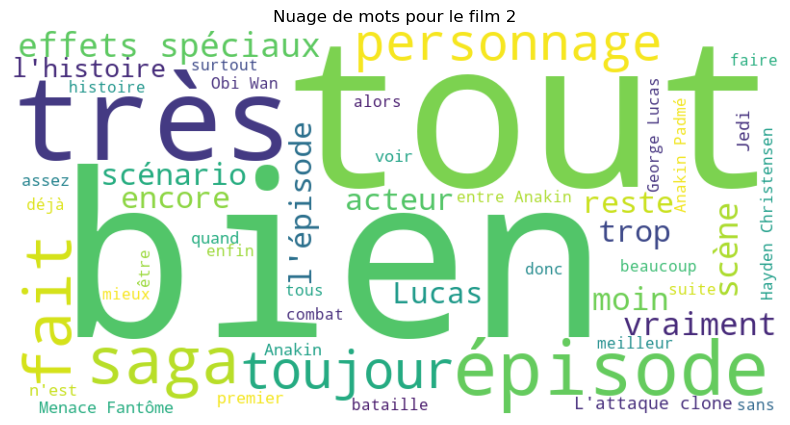

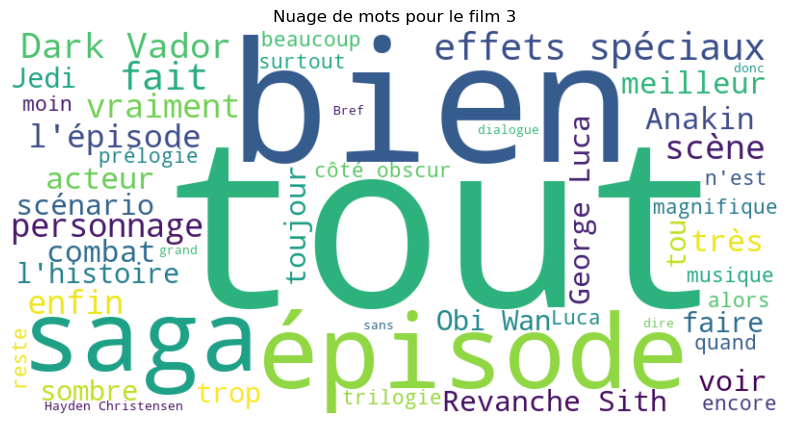

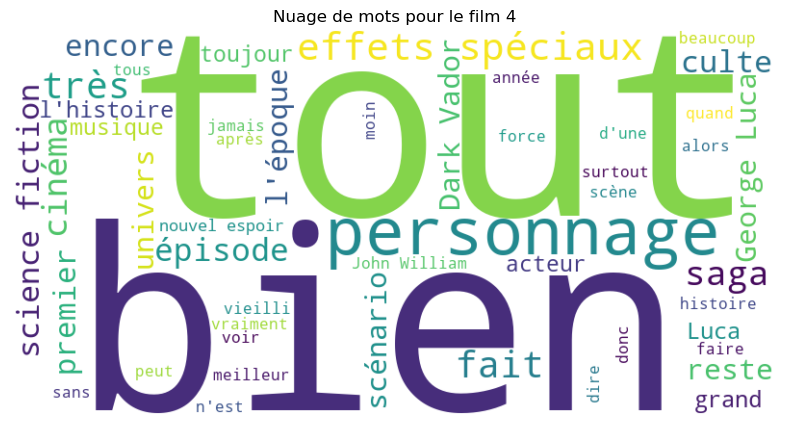

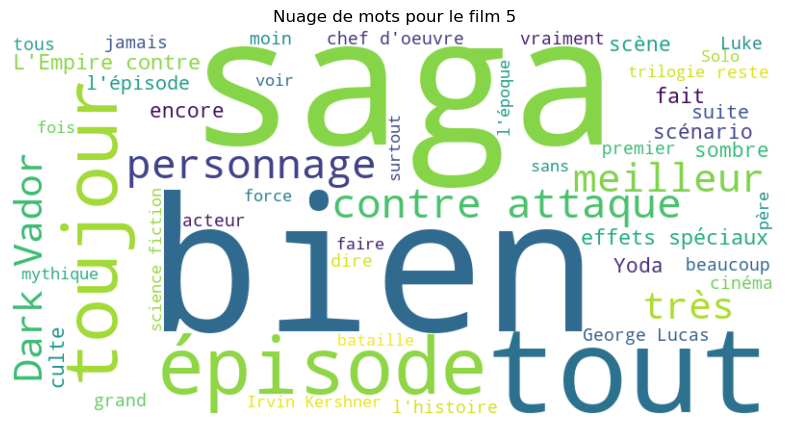

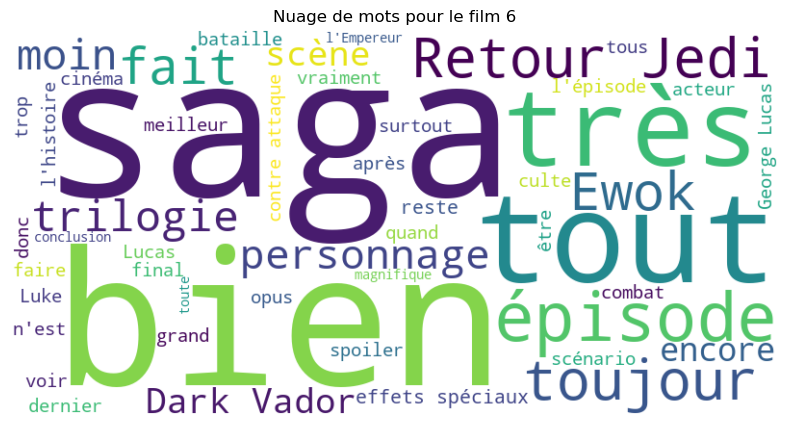

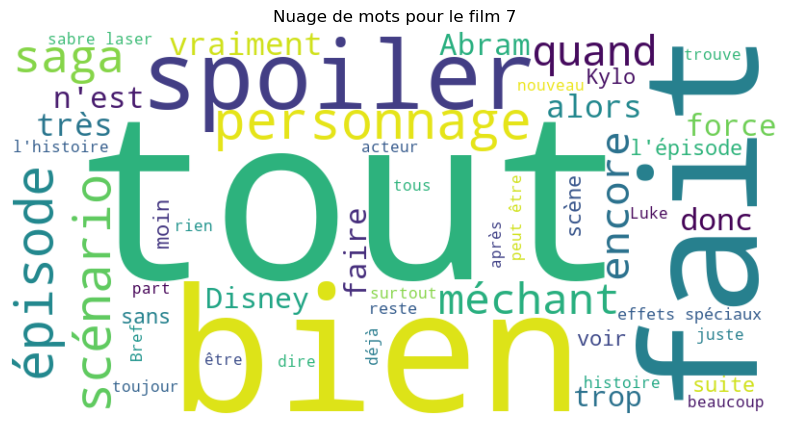

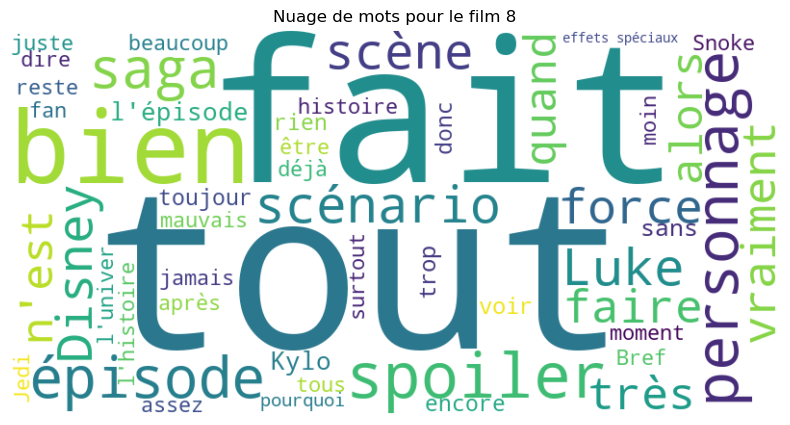

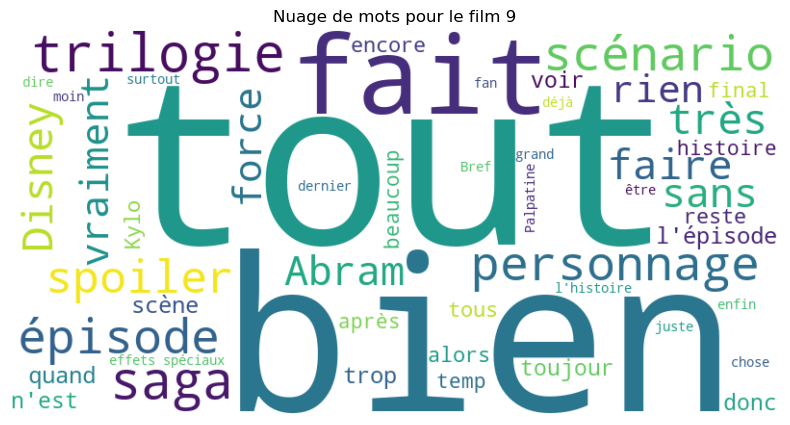

In [34]:
# Liste des mots inutiles à supprimer
exclure_mots = ['pour', 'n', 'aurez', 'de', 'étions', 'vos', 'sera', 'avec', 'serez', 's', 'au', 'aient', 'eussent', 'ses', 
                'fut', 'seriez', 'ma', 'toi', 'étées', 'fussions', 'eussiez', 'pas', 'soyons', 'les', 'c', 'avais', 't', 'que', 
                'serons', 'aie', 'eux', 'avions', 'auriez', 'serait', 'aviez', 'soient', 'te', 'aux', 'ait', 'serions', 'du', 
                'eues', 'd', 'eûtes', 'moi', 'étant', 'mon', 'me', 'été', 'eut', 'eus', 'seraient', 'en', 'fusses', 'tu', 'étants', 
                'fusse', 'auras', 'à', 'étais', 'as', 'je', 'eue', 'notre', 'aura', 'ayant', 'étiez', 'tes', 'aurait', 'se', 'étaient', 
                'il', 'sont', 'serais', 'serai', 'ayez', 'y', 'fussiez', 'aurions', 'son', 'par', 'ton', 'ont', 'est', 'seras', 'mais', 
                'mes', 'fussent', 'auront', 'ce', 'avait', 'êtes', 'ou', 'ta', 'et', 'eusses', 'aurons', 'le', 'étante', 'sommes', 'seront', 
                'ai', 'soyez', 'étantes', 'ils', 'leur', 'ces', 'ne', 'eût', 'fûmes', 'nos', 'un', 'ayantes', 'sois', 'eûmes', 'vous', 'alor', 
                'auraient', 'l', 'eu', 'aurais', 'des', 'es', 'suis', 'sa', 'étée', 'eurent', 'fus', 'soit', 'eusse', 'lui', 'm', 'furent', 
                'fût', 'elle', 'étés', 'avez', 'ayants', 'avaient', 'qu', 'était', 'avons', 'aurai', 'même', 'votre', 'nous', 'j', 'on', "d'un", "j'ai",
                'dans', 'la', 'ayante', 'fûtes', 'aies', 'qui', 'une', 'ayons', 'eussions', 'sur', 'd', 'du', 'de', 'la', 'des', 'le', 'et', 'cela', 'cet', 'cette',
                'est', 'elle', 'une', 'en', 'que', 'aux', 'qui', 'ces', 'les', 'dans', 'sur', 'l', 'un', 'pour', 'par', 'il', 'ou', 'à', 'ce', 'a', "qu'il",
                'sont', 'cas', 'plus', 'leur', 'se', 's', 'vous', 'au', 'c', 'aussi', 'toutes', 'autre', 'comme', 'Star', 'War', 'film', 'Wars', "c'est"]


exclure_mots = list(set(exclure_mots))
vect = TfidfVectorizer(stop_words=exclure_mots)
vect_text = vect.fit_transform(star_wars['Content_cleaned_text'])

# Mots importants
vocab = vect.get_feature_names_out()

# Fonction pour dessiner un nuage de mots
def draw_word_cloud(film_number):
    text = " ".join(review for review in star_wars[star_wars['film'] == film_number]['Content_cleaned_text'])
    wordcloud = WordCloud(stopwords=exclure_mots, background_color='white', max_words=50, width=800, height=400).generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Nuage de mots pour le film {film_number}')
    plt.show()

for film_number in star_wars['film'].unique():
    draw_word_cloud(film_number)

## 3. Analyse de sentiments

In [ ]:
# 2ème fonction de clean de texte
def clean_text(text):
    text = text.lower()
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Fonction pour détecter le sentiment en utilisant VADER
def get_vader_sentiment(text):
    sia = SentimentIntensityAnalyzer()
    sentiment_scores = sia.polarity_scores(text)
    return sentiment_scores

In [8]:
star_wars['cleaned_content'] = star_wars['Content'].apply(clean_text)

# Analyser le sentiment de chaque avis
star_wars['sentiment_scores'] = star_wars['cleaned_content'].apply(get_vader_sentiment)

# Extraire les scores
star_wars['compound'] = star_wars['sentiment_scores'].apply(lambda x: x['compound'])
star_wars['neg'] = star_wars['sentiment_scores'].apply(lambda x: x['neg'])
star_wars['neu'] = star_wars['sentiment_scores'].apply(lambda x: x['neu'])
star_wars['pos'] = star_wars['sentiment_scores'].apply(lambda x: x['pos'])

# Calculer le sentiment moyen par film
average_sentiment_per_film = star_wars.groupby('film')[['compound', 'neg', 'neu', 'pos']].mean()
print(average_sentiment_per_film)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\mathi\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


      compound       neg       neu       pos
film                                        
1    -0.273231  0.059578  0.912114  0.028312
2    -0.198463  0.051173  0.923515  0.025317
3    -0.236919  0.054757  0.919506  0.025296
4    -0.195841  0.048601  0.925270  0.026126
5    -0.170529  0.051354  0.920990  0.027664
6    -0.210803  0.053766  0.920296  0.025925
7    -0.254779  0.049012  0.921986  0.029005
8    -0.336169  0.059020  0.914736  0.026241
9    -0.217881  0.052245  0.919211  0.028550
